In [1]:
import pandas as pd
import os
import datetime
import zipfile
import re
from Images_of_given_index import image_true_color
from IPython.display import Audio, display
from timeit import default_timer as timer
import glob
start = timer()
def alert():
  global start
  end= timer()
  print("\n\nDuration in minutes : " +  str((end - start)/60) + " minutes." )
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [2]:
biggest_fires = [  
                 ("2017-06-16T00:00:00.000Z", "2017-06-24T00:00:00.000Z" ,"39.95", "-8.233333" , "Pedrogão grande" ),
                 ("2018-08-03T00:00:00.000Z", "2018-08-17T00:00:00.000Z" ,"37.396944", "-8.588889" , "Serra de Monchique"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.116667", "-8.25" , "Lousã"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.05", "-7.95" , "Pampilhosa da Serra"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"39.747767", "-8.949711" , "Pinhal de Leiria"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.416667", "-7.7" , "Seia"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.488733", "-7.864655" , "Nelas"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.6", "-7.766667" , "Mangualde"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.491022", "-7.593597" , "Gouveia"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.360278", "-7.861667" , "Oliveira do Hospital"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.360345", "-8.029032" , "Tábua"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.302222", "-8.166111" , "Penacova"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.393056", "-8.233333" , "Mortágua"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.516667", "-8.083333" , "Tondela"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.269030", "-7.988616" , "Coja, Arganil"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.85", "-8.4" , "Vale de Cambra"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"39.800833", "-8.100278" , "Sertã"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"42.044444", "-8.443333" , "Monção"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.4", "-8.133333" , "Santa Comba Dão"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.2175", "-8.852778" , "Quiaios"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.316667", "-8.8" , "Tocha"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.433333", "-8.733333" , "Mira"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.55", "-8.683333" , "Vagos"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.6", "-8.666667" , "Ílhavo"),
                 ("2017-10-13T00:00:00.000Z", "2017-10-18T00:00:00.000Z" ,"40.433333", "-8" , "Carregal do Sal")
]
fires = pd.DataFrame(biggest_fires, 
         columns = ['datetime_from' , 'datetime_to', 'lat', 'lon' , "description"]
        ) 
fires

,datetime_from,datetime_to,lat,lon,description
0,2017-06-16T00:00:00.000Z,2017-06-24T00:00:00.000Z,39.95,-8.233333,Pedrogão grande
1,2018-08-03T00:00:00.000Z,2018-08-17T00:00:00.000Z,37.396944,-8.588889,Serra de Monchique
2,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,40.116667,-8.25,Lousã
3,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,40.05,-7.95,Pampilhosa da Serra
4,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,39.747767,-8.949711,Pinhal de Leiria
5,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,40.416667,-7.7,Seia
6,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,40.488733,-7.864655,Nelas
7,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,40.6,-7.766667,Mangualde
8,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,40.491022,-7.593597,Gouveia
9,2017-10-13T00:00:00.000Z,2017-10-18T00:00:00.000Z,40.360278,-7.861667,Oliveira do Hospital


In [ ]:
def find_images(coords,sensing_date_FROM,sensing_date_TO,filename, sentinel=2) :
    global USERNAME
    global PASSWORD
    command = "dhusget.sh -u "+USERNAME+" -p "+PASSWORD +" -S "+sensing_date_FROM+" -E "+sensing_date_TO +" -c "+coords
    if sentinel !=0 :
        command = command + " -m Sentinel-"+ str(sentinel)
    command = command + " -q " + filename +  ".xml -C " + filename + ".csv"
    os.system(command)

In [ ]:
def date_to_iso_format (date,time,before=True):
    date = str(date)
    if (date=="nan") :
        return "nan"
    splited = date.split('/')
    dt = datetime.datetime(int(splited[2]), int(splited[1]),  int(splited[0]))
    iso = str(dt.year) + "-" + str(dt.month) + "-" + str(dt.day)
    newtime = "T" + time + ".000Z"
    iso = iso +  newtime
    return iso

date_to_iso_format("07/08/2015", "06:44:00")

In [ ]:
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'N':
        dd *= -1
    return dd;
print(dms2dd(8,17,1.2876,'N'))
dms2dd(39,56,36.3696,'W')

In [ ]:
def dms_to_decimal(text,direction):
    print(text)
    splited = text.split(':')
    if len(splited) < 3 : 
        return "0"
    else :
        degrees = splited[0]
        minutes = splited[1]
        seconds = splited[2].replace('\'', "")
    result = dms2dd(degrees, minutes, seconds, direction)
    print( result )
    return result
print(dms_to_decimal("40:33:26.5068000000082''" , 'W'))
dms_to_decimal( "7:41:29.922000000001'' ", 'N' )

In [ ]:
USERNAME = ''
PASSWORD = ''
lon1="-4"
lat1="30"
lon2="26"
lat2="46"
coords = lon1 + "," + lat1 + ":" + lon2 + "," + lat2 
sensing_date_FROM = "2015-01-01T06:00:00.000Z"
sensing_date_TO = "2016-01-01T06:00:00.000Z"
filename = "./images_with_fires_results/test"
#find_images(coords,sensing_date_FROM,sensing_date_TO,filename)

# Find Images

In [ ]:
for index, row in fires.iterrows():
    lat = row["lat"]
    lon = row["lon"]
    lon1= str( float(lon)-0.15 )
    lat1= str( float(lat)-0.15 )
    lon2= str( float(lon)+0.15 )
    lat2= str( float(lat)+0.15 )
    coords = lon1 + "," + lat1 + ":" + lon2 + "," + lat2 
    sensing_date_FROM = row["datetime_from"]
    sensing_date_TO = row["datetime_to"]
    filename = "./images_with_fires_results/index"+str(index)
    print(coords,sensing_date_FROM,sensing_date_TO,filename)
    print("\n")
    find_images(coords,sensing_date_FROM,sensing_date_TO,filename,sentinel=2)
    

# Download images

In [ ]:
files = glob.glob("./images_with_fires_results/*.csv")

for file in files : 
    global USERNAME, PASSWORD
    if (os.path.getsize(file) >0 ) :
        downloads = pd.read_csv(file, sep=',' , encoding="utf-8",na_values="nan",header=None)
        splited = file.split('\\')
        id_fire = splited[len(splited)-1][:-4]
        for index, row in downloads.iterrows():
            outputpath = "../../Satellite_img/" + id_fire
            if (not os.path.isdir(outputpath)):
                os.mkdir(outputpath)
            outputpath = outputpath + '/' + row[0] + '.zip'
            command = "wget --continue --user="+USERNAME+" --password="+PASSWORD+" \""+ row[1] + "/$value" +"\" -O " + outputpath
            print(outputpath,"\n\n")
            os.system(command)

# Unnzipping and setting up downloaded images

In [ ]:
indexs = os.listdir("../../Satellite_img/") 
print ( indexs)  # indexes of fires of images founded
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img/index"+ index_id
    images_ids = os.listdir(path) # images founded for index choosen
    for file in images_ids : 
        print(file)
        path_with_img_id = path + "/" + file
        if ( zipfile.is_zipfile(path_with_img_id) and os.stat(path_with_img_id).st_size >0  ) :
            with zipfile.ZipFile(path_with_img_id,"r") as zip_ref:
                path_output = path + "/" + file [ 37 :  ]
                cut = len(path_output)-4
                path_output = path_output [ : cut ]
                print(path_output)
                names = zip_ref.namelist()
                regexp = re.compile(r'.*SAFE/GRANULE/.*/IMG_DATA/.*B0[2348]')
                img_data = []
                for f in names :
                    if  regexp.search(f) :
                        img_data.append(f)
                print(len(img_data))
                zip_ref.extractall(  members =  img_data , path = path_output )
        os.remove(path_with_img_id)

# Visualizing images

In [3]:
indexs = os.listdir("../../Satellite_img/") 
n_total = 0
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img/index"+ index_id
    images_ids = os.listdir(path) 
    for image_id in images_ids : 
        n_total = n_total + 1
print("Number of Images = ",n_total )

Number of Images =  6




->>>>>>>>>>>>>>>>>> 1    _T29SNB_20180808T141603       Image 1  of  6   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


3540 3740 6001 6201


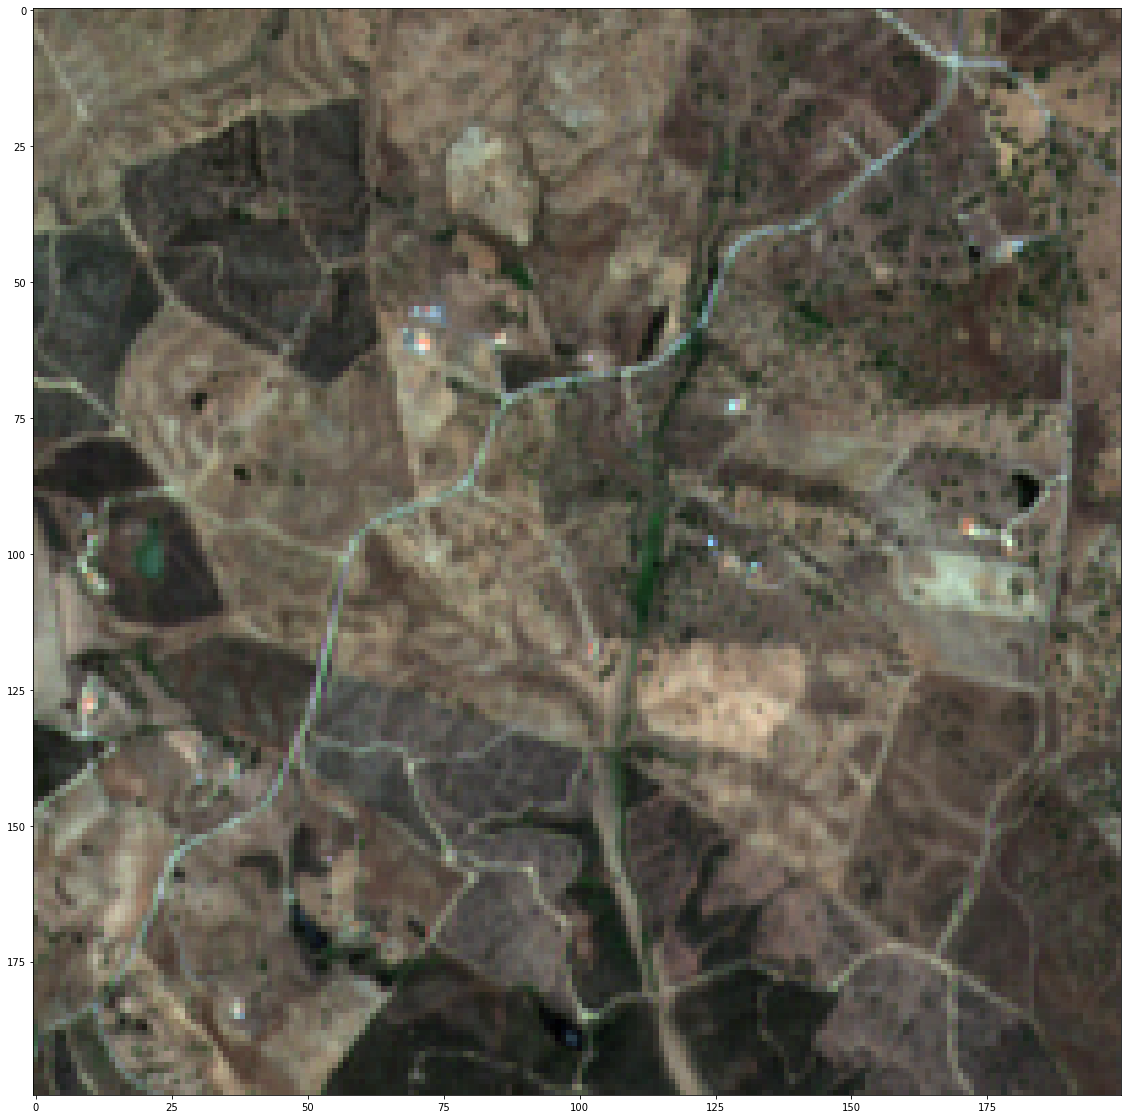



Duration in minutes : 1.7686492633333335 minutes.




->>>>>>>>>>>>>>>>>> 1    _T29SNB_20180813T181703       Image 2  of  6   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


3540 3740 6001 6201


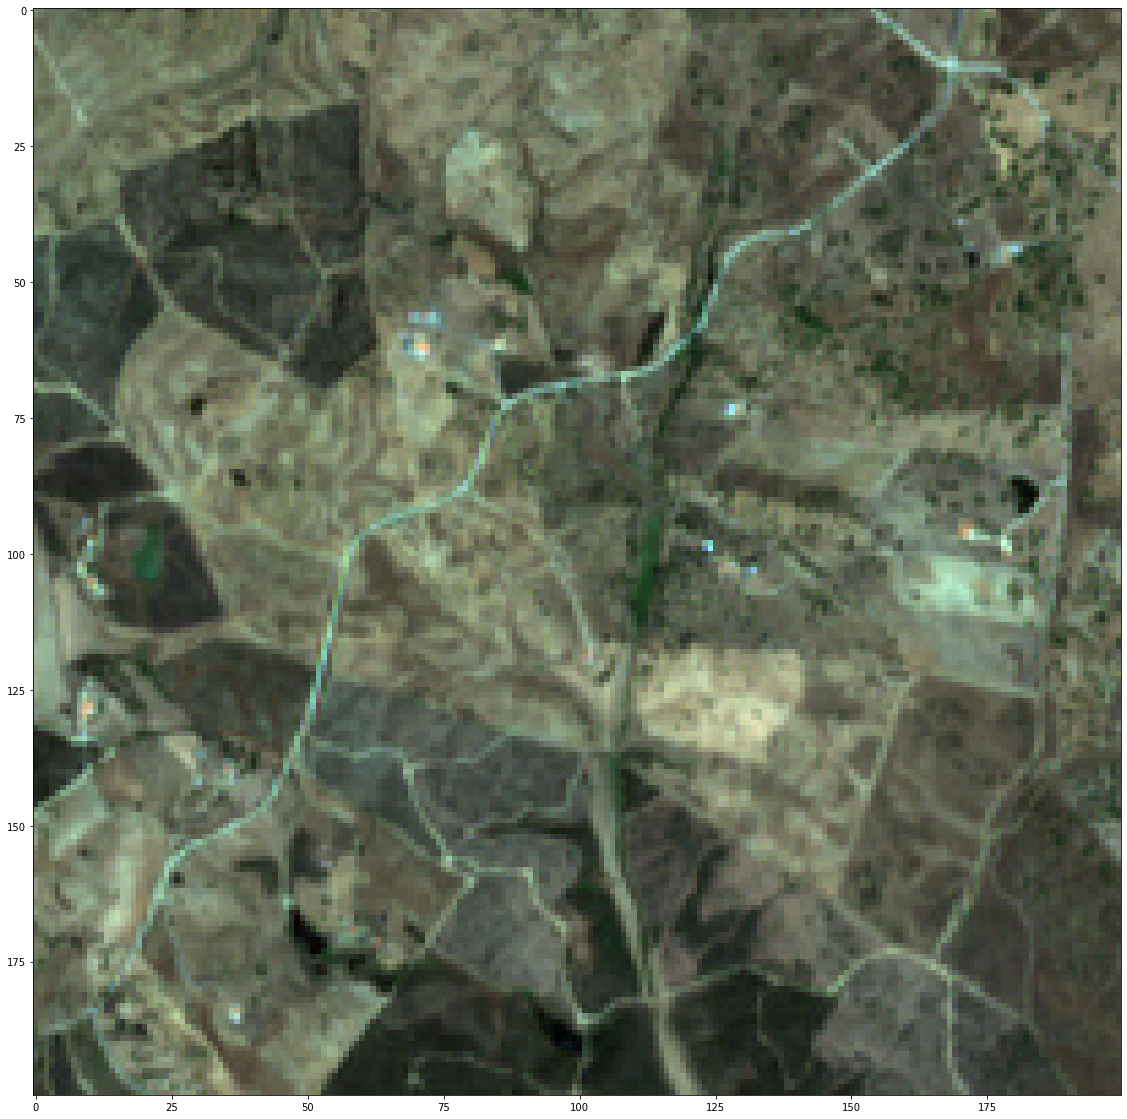



Duration in minutes : 3.4054055733333333 minutes.




->>>>>>>>>>>>>>>>>> 12    _T29TNE_20171015T113318       Image 3  of  6   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


6408 6608 2733 2933


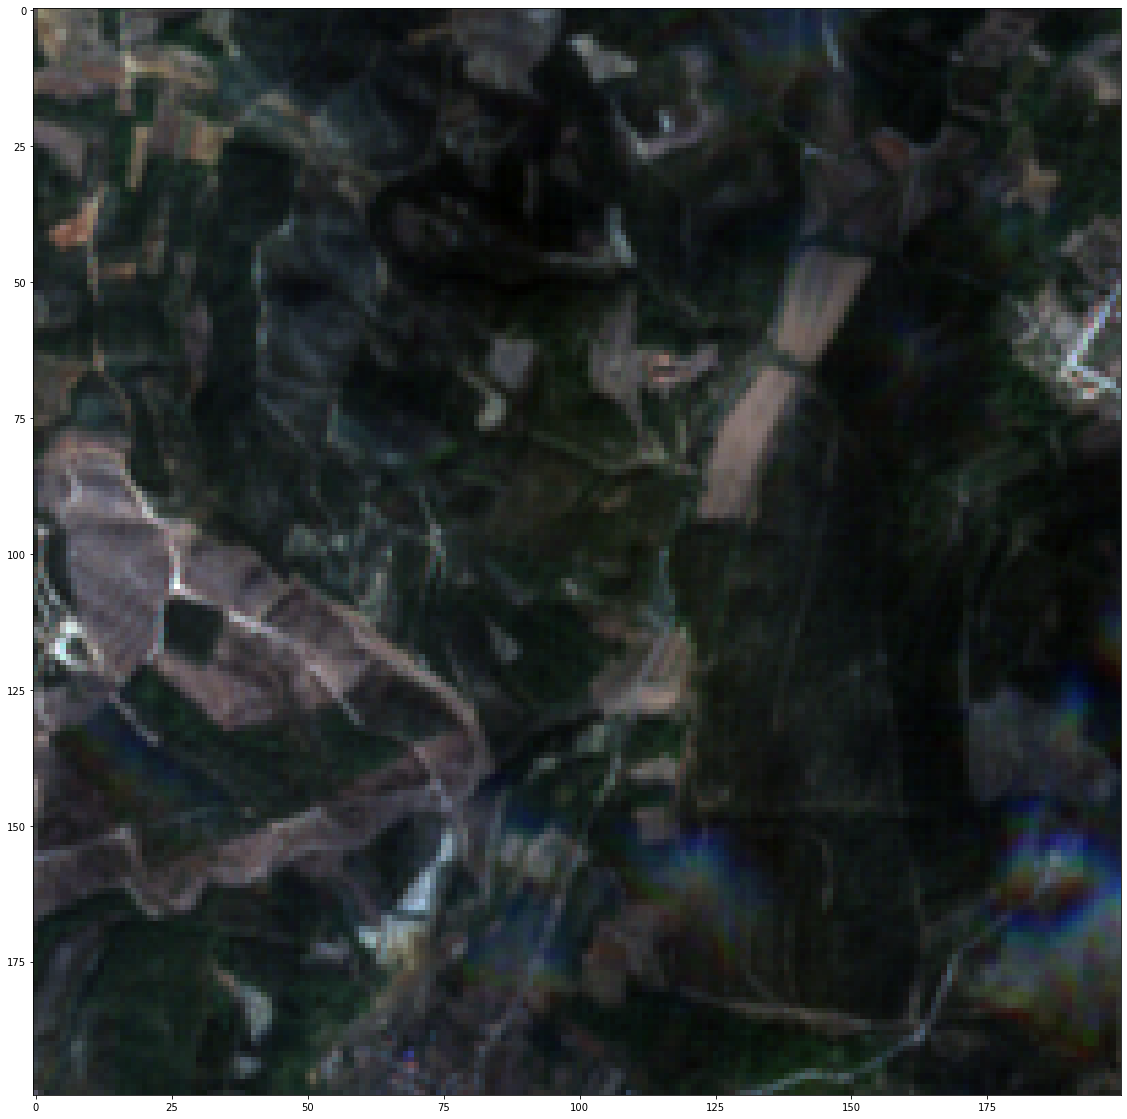



Duration in minutes : 4.467066963333334 minutes.




->>>>>>>>>>>>>>>>>> 19    _T29TNE_20171015T113318       Image 4  of  6   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


1154 1354 4709 4909


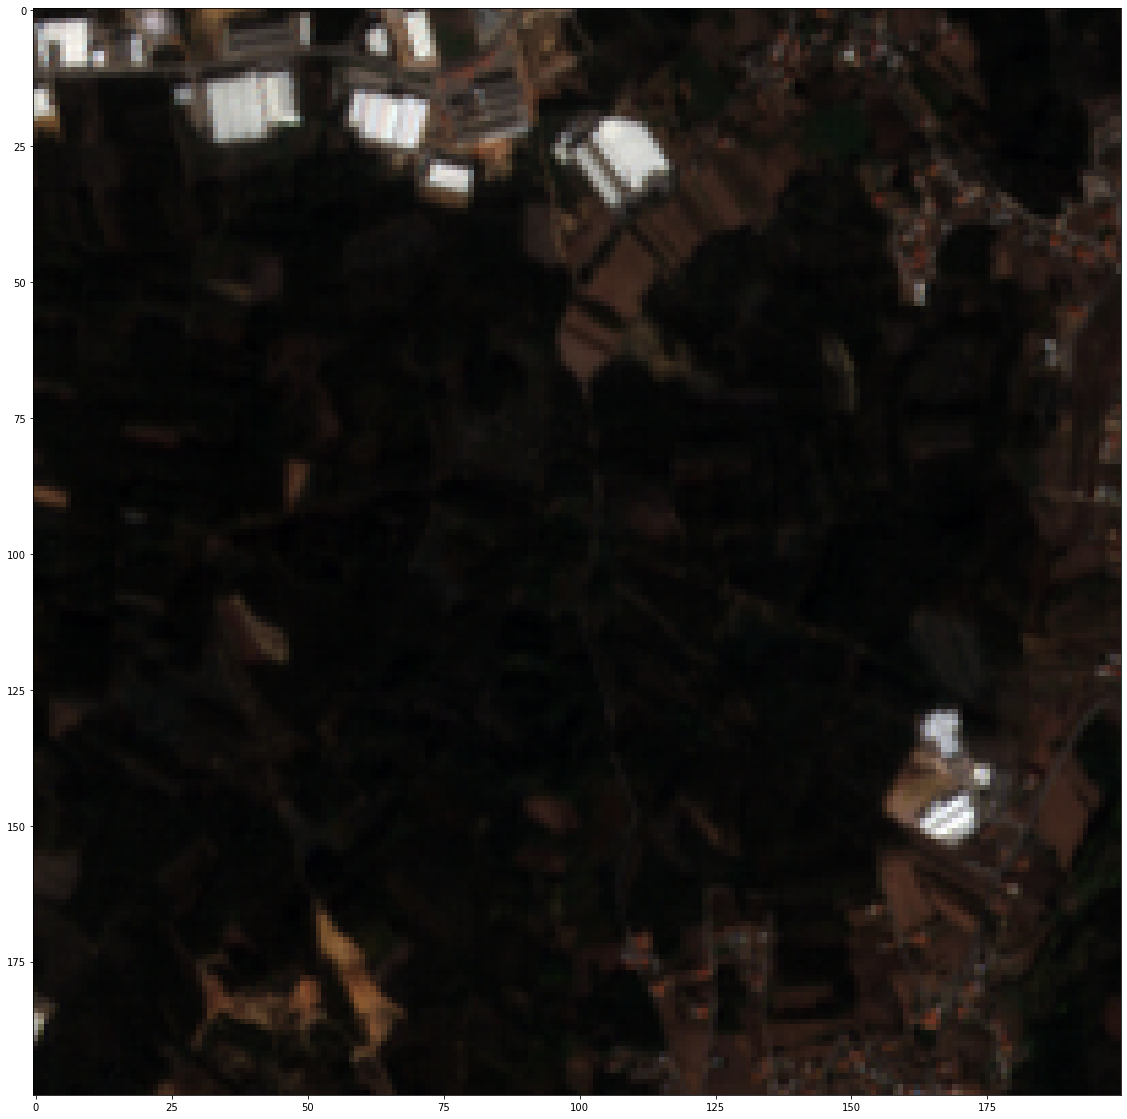



Duration in minutes : 5.53113243 minutes.




->>>>>>>>>>>>>>>>>> 20    _T29TNE_20171015T113318       Image 5  of  6   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


1601 1801 3607 3807


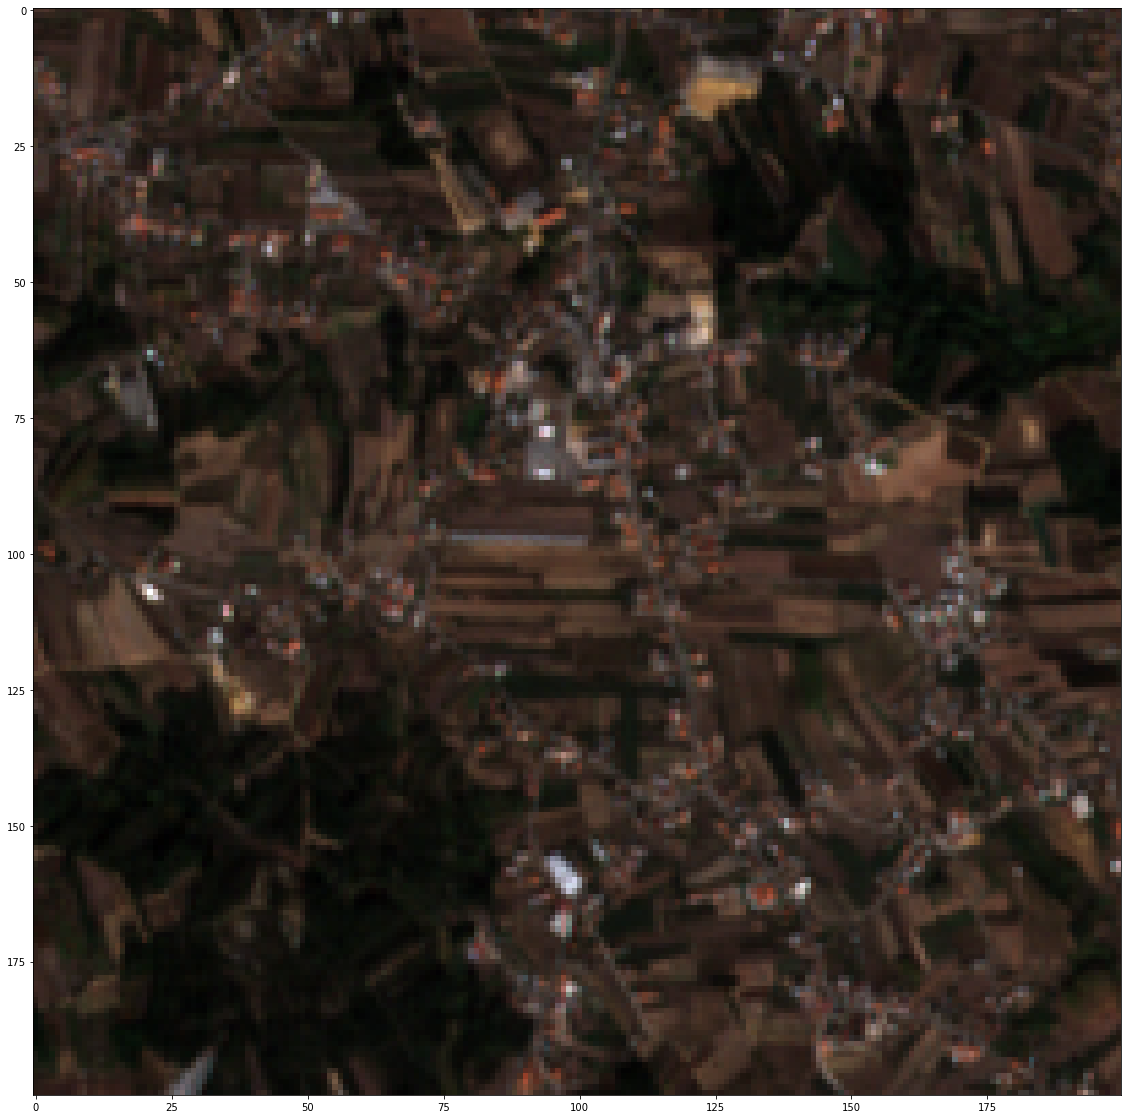



Duration in minutes : 6.586342411666667 minutes.




->>>>>>>>>>>>>>>>>> 21    _T29TNE_20171015T113318       Image 6  of  6   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


2163 2363 2311 2511


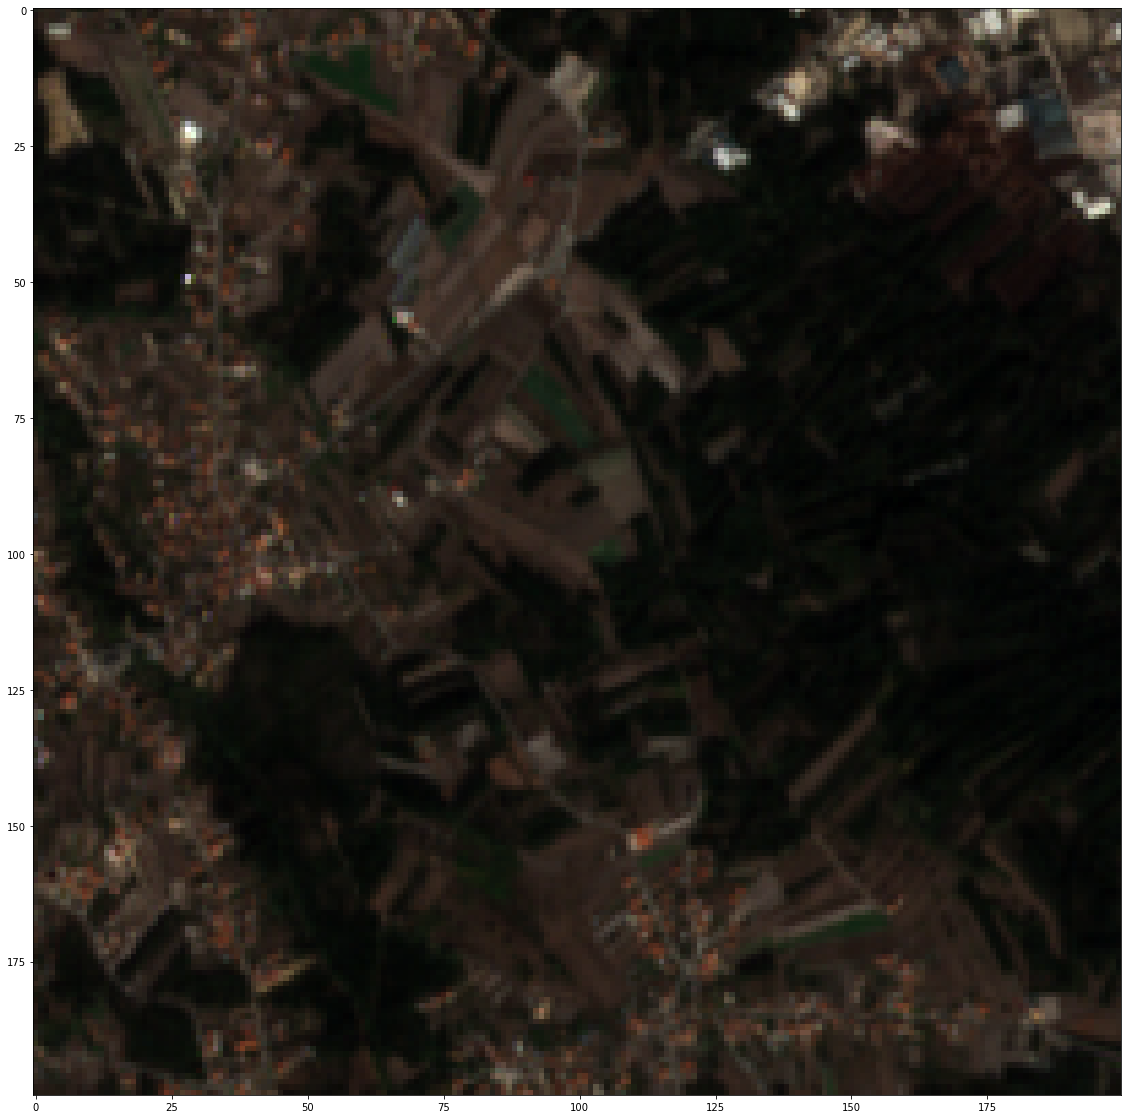



Duration in minutes : 8.069610221666668 minutes.


In [4]:
indexs = os.listdir("../../Satellite_img/")
n=0
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img/index"+ index_id
    images_ids = os.listdir(path) # images founded for index choosen
    for image_id in images_ids :
        n= n + 1 
        print("\n\n->>>>>>>>>>>>>>>>>>", index_id,"  " ,image_id, "      Image", n ," of " , n_total ,"  \n\n " )
        
        images_path  = "../../Satellite_img/"
        
        path = images_path + 'index' + index_id + '/' + image_id

        for name_safe in os.listdir(path) :
            if  image_id in name_safe :
                safe = name_safe

        path = path + '/' + safe + '/GRANULE/'
        semifolder = os.listdir(path)[0]
        path = path + '/' + semifolder + '/IMG_DATA/'
        
        if len(os.listdir(path)) > 3 :
            DifRes = False
        else :
            DifRes = True
        lat = fires.loc[int(index_id)]["lat"]
        lon = fires.loc[int(index_id)]["lon"]
        image_true_color(index_id,image_id ,images_path, lon , lat ,DifRes)

        alert()